# Aplicaciones

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
sns.set_theme(context = "paper", style = "darkgrid")

In [83]:
funcion = lambda x : -5 + x**2

**Actividad** Implementar método de búsqueda binaria (o de bisección) para la función dada

In [84]:
def biseccion_recursiva(f, a, b, error = 0.00001, contador = 0, lista_a = [], lista_b = []):
    error = error
    contador = contador
    lista_a = lista_a
    lista_b = lista_b
    lista_a.append(a)
    lista_b.append(b)
    if contador % 5 == 0:
        print(f"El intervalo a evaluar es a = {a} y b = {b}")
    if f(a) * f(b) > 0:
        print("No existe la raíz en este intervalo")
        return None, lista_a, lista_b
    
    if abs(f(a)) <= error:
        print(f"La raíz es r = {a}, se encontró después de {contador} iteraciones")
        return a, lista_a, lista_b
    if abs(f(b)) <= error:
        print(f"La raíz es r = {b}, se encontró después de {contador} iteraciones")
        return b, lista_a, lista_b

    c = (a + b) / 2
    contador += 1
    if abs(f(c)) <= error:
        print(f"La raíz es r = {c}, se encontró después de {contador} iteraciones")
        return c, lista_a, lista_b
    
    if f(a) * f(c) < 0:
        return biseccion_recursiva(f, a, c, error = error, contador = contador, lista_a = lista_a, lista_b = lista_b)
    
    return biseccion_recursiva(f, c, b, error = error, contador = contador, lista_a = lista_a, lista_b = lista_b)


In [85]:
raiz, lista_a, lista_b = biseccion_recursiva(funcion, 0, 10)

El intervalo a evaluar es a = 0 y b = 10
El intervalo a evaluar es a = 2.1875 y b = 2.5
El intervalo a evaluar es a = 2.2265625 y b = 2.236328125
El intervalo a evaluar es a = 2.23602294921875 y b = 2.236328125
El intervalo a evaluar es a = 2.2360610961914062 y b = 2.2360706329345703
La raíz es r = 2.2360658645629883, se encontró después de 21 iteraciones


In [86]:
raiz

2.2360658645629883

In [87]:
lista_a[-5 :]

[2.23602294921875,
 2.23602294921875,
 2.2360610961914062,
 2.2360610961914062,
 2.2360610961914062]

In [88]:
lista_b[-5 :]

[2.236175537109375,
 2.2360992431640625,
 2.2360992431640625,
 2.2360801696777344,
 2.2360706329345703]

In [89]:
x = np.linspace(-1, 11, 1001)
y = funcion(x)

In [90]:
arreglo_a = np.array(lista_a)
arreglo_b = np.array(lista_b)
y_recorrido = np.zeros(arreglo_a.size)

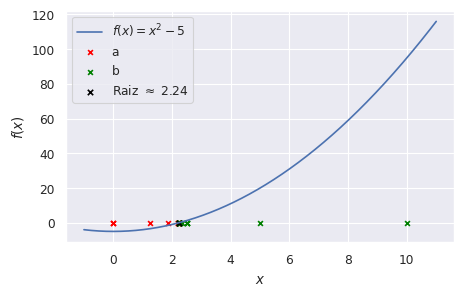

In [91]:
plt.figure(figsize = (5, 3))
plt.plot(x, y, label = "$f(x) = x^2 - 5$")
plt.scatter(arreglo_a, y_recorrido, s = 12, color = "red", marker = "x", label = "a")
plt.scatter(arreglo_b, y_recorrido, s = 12, color = "green", marker = "x", label = "b")
plt.scatter(raiz, 0, color = "black", s = 15, marker = "x", label = f"Raiz $\\approx$ {raiz :.2f}")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc = "best")
plt.show()

In [92]:
def derivada(y, dx):
    y_prima = np.zeros(y.size)
    y_der = y[2 :]
    y_izq = y[: -2]
    
    y_prima[1 : -1] = (y_der - y_izq) / (2 * dx)
    y_prima[0] = (y[1] - y[0]) / dx
    y_prima[-1] = (y[-1] - y[-2]) / dx

    return y_prima


In [93]:
x, dx = np.linspace(0, 2 * np.pi, 101, retstep = True)
y = np.sin(x)
y_prima = derivada(y, dx)

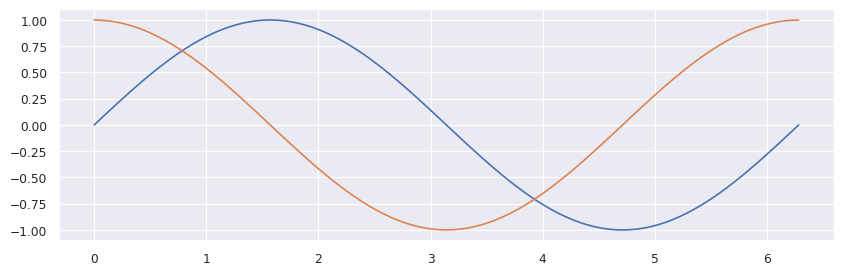

In [94]:
plt.figure(figsize = (10, 3))
plt.plot(x, y)
plt.plot(x, y_prima)
plt.show()

In [95]:
from simulacion import euler, graficar_desplazamiento, graficar_velocidad

In [96]:
t0 = 0
tf = 100
x0 = 0
v0 = 1
n = 100000

In [97]:
fuerza = lambda x, v, i : -x[i - 1] if i <= 40000 else -x[i - 1] - 0.18 * v[i - 1]
resultados = euler(t0, tf, x0, v0, n, fuerza = fuerza)

In [98]:
x = resultados["x"]
v = resultados["v"]
t = resultados["t"]
dt = resultados["dt"]

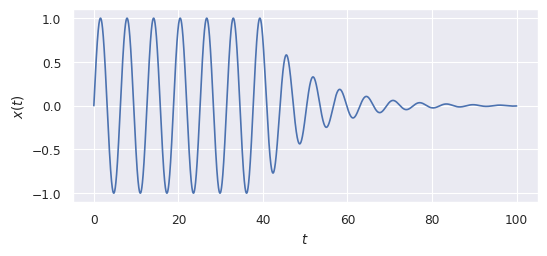

In [99]:
graficar_desplazamiento(t, x)

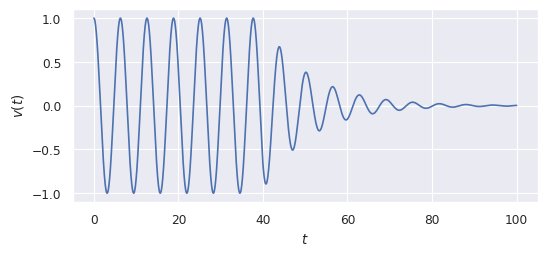

In [100]:
graficar_velocidad(t, v)